# Домашнее задание

- Скачайте текст войны и мир (ссылка на [github](https://github.com/netology-code/ds3-spring-2018/tree/master/7.%20Time_series/7.4/war_and_peace) и [гугл диск](https://drive.google.com/drive/u/2/folders/1aM7cNI6Qs7AyeYpQ8lNg7vLsHzIl0JbU)). Очистите его, оставив только русские буквы и символы пробела. Постройте матрицу переходных вероятностей. Посчитайте вероятность встретить строку из 4-х символов, которая начинается п, а кончается на р; Используя матрицу переходных вероятностей сгенерируйте слово, начинающееся с буквы "Б" и имеющее длину 8-мь символов
- [Выберите ряд](https://datamarket.com/data/list/?q=cat:fpg%20provider:tsdl) и оцените его через HMM. Попробуйте "построить" (через среднее каждой компоненты) наивный прогноз ряда.

In [25]:
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
sns.set()
import warnings
warnings.filterwarnings('ignore')

## Часть 1.

In [27]:
!wget -d 'https://raw.githubusercontent.com/netology-code/ds3-spring-2018/master/7.%20Time_series/7.4/war_and_peace/tom_1.txt'
!wget -d 'https://raw.githubusercontent.com/netology-code/ds3-spring-2018/master/7.%20Time_series/7.4/war_and_peace/tom_2.txt'
!wget -d 'https://raw.githubusercontent.com/netology-code/ds3-spring-2018/master/7.%20Time_series/7.4/war_and_peace/tom_3.txt'
!wget -d 'https://raw.githubusercontent.com/netology-code/ds3-spring-2018/master/7.%20Time_series/7.4/war_and_peace/tom_4.txt'

Debugging support not compiled in. Ignoring --debug flag.
--2020-05-11 13:49:32--  https://raw.githubusercontent.com/netology-code/ds3-spring-2018/master/7.%20Time_series/7.4/war_and_peace/tom_1.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.244.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.244.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1273582 (1,2M) [text/plain]
Saving to: ‘tom_1.txt’

tom_1.txt           100%[===================>]   1,21M  2,30MB/s    in 0,5s    

2020-05-11 13:49:32 (2,30 MB/s) - ‘tom_1.txt’ saved [1273582/1273582]

Debugging support not compiled in. Ignoring --debug flag.
--2020-05-11 13:49:32--  https://raw.githubusercontent.com/netology-code/ds3-spring-2018/master/7.%20Time_series/7.4/war_and_peace/tom_2.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.244.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.10

In [28]:
text = ''
for i in range(4):
    with open('tom_{}.txt'.format(i+1), 'r') as f:
        text += f.read().lower()
text = re.sub('[^а-я\s]','', text)
text = re.sub('\s',' ', text)
text = re.sub(' +',' ', text)

In [33]:
cyr = 'абвгдежзийклмнопрстуфхцчшщъыьэюя '
pos = {j:i for i,j in enumerate(cyr)}

In [34]:
probs = np.zeros((len(cyr), len(cyr)))
for cp, cn in zip(text[:-1], text[1:]):
    probs[pos[cp], pos[cn]] += 1

In [35]:
probs = probs / probs.sum(axis=1)[:, None]

In [36]:
df = pd.DataFrame(probs, index = (i for i in cyr), columns = (i for i in cyr))

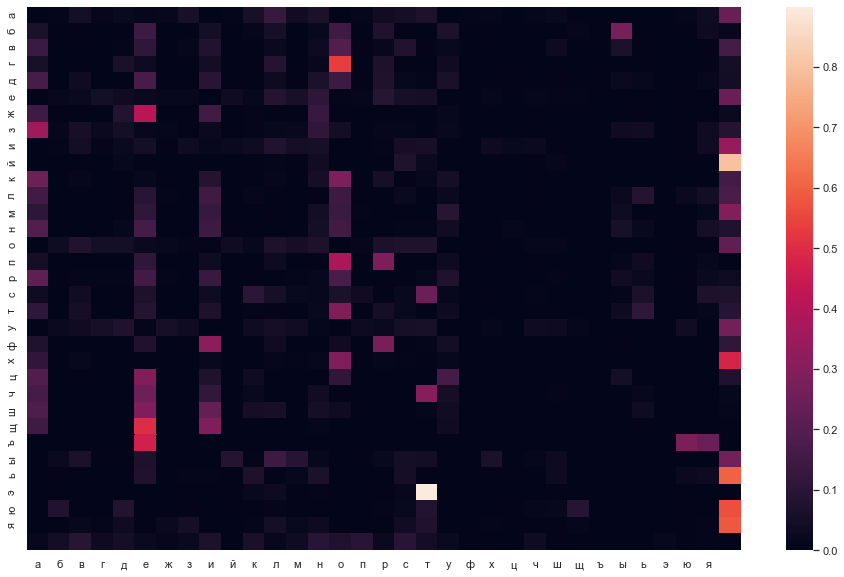

In [37]:
plt.figure(figsize=(16, 10))
sns.heatmap(df)
plt.show()

In [ ]:
start = pos['п']
end = pos['р']
length = 4
prior = 1. / len(cyr)
for i in range(length):
    index = pos[s[i]]
    next_char = np.random.choice(list(cyr), p=probs[index])
    s.append(next_char)

print (''.join(s))

In [137]:
start = pos['п']
end = pos['р']
prior = 1. / len(cyr)
proba_fin = 0
proba_fin += prior
for c1 in cyr:
    for c2 in cyr:
        proba = prior * probs[start, pos[c1]] * probs[pos[c1], pos[c2]] * probs[pos[c2], end]
        if proba > 0:
            proba_fin += proba
print('Вероятность встретить слово "п**р" равняется {}.'.format(proba_fin))

Вероятность встретить слово "п**р" равняется 0.03128474210545203.


In [61]:
s = []
start = 'б'
s.append(start)
length = 8
for i in range(length):
    index = pos[s[i]]
    next_char = np.random.choice(list(cyr), p=probs[index])
    s.append(next_char)

print (''.join(s))

бытеноня 


## Часть 2.

С ссылкой проблемы, поэтому выберу ряд из прошлых лекций.

In [66]:
from hmmlearn.hmm import GaussianHMM
series = pd.read_csv('../Архив/Series/international-airline-passengers.csv')["Count"]
values = series.values.reshape(-1,1)

In [135]:
for n in range(1, 12):
    model = GaussianHMM(n_components=n,
                        covariance_type="diag",
                        n_iter=1000)
    model.fit(values)
    print (n, model.score(values))

1 -893.1837902090575
2 -803.8479638762091
3 -767.0819417008181
4 -743.9977519551946
5 -731.3629628719801
6 -706.6057596024548
7 -694.9945555321286
8 -673.9336800691148
9 -664.2465557766129
10 -656.1684316480492
11 -650.2620800745818


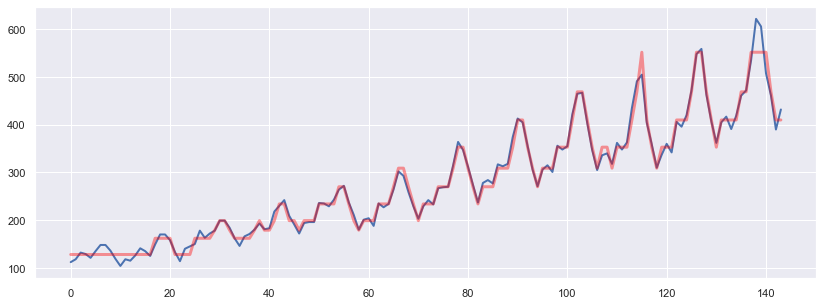

In [131]:
model = GaussianHMM(n_components=11,
                        covariance_type="diag",
                        n_iter=1000)
model.fit(values)
labels = model.predict(values)
means = np.zeros_like(values)
for i in range(model.n_components):
    means[labels == i] = model.means_[i]
    
plt.figure(figsize=(14, 5))
plt.plot(values, linewidth=2)
plt.plot(means, linewidth=3, alpha=.4, color='red')